In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
%matplotlib inline
import math
import seaborn as sns
from initial_cleaning import initial_cleaning
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
initial_cleaning('NYC_Offenses_2013.csv')

                             Table 8  Unnamed: 1      Unnamed: 2  \
0                           NEW YORK         NaN             NaN   
1  Offenses Known to Law Enforcement         NaN             NaN   
2                      by City, 2013         NaN             NaN   
3                               City  Population  Violent\ncrime   
4                      Adams Village       1,861               0   

                               Unnamed: 3                    Unnamed: 4  \
0                                     NaN                           NaN   
1                                     NaN                           NaN   
2                                     NaN                           NaN   
3  Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1   
4                                       0                           NaN   

                    Unnamed: 5 Unnamed: 6           Unnamed: 7  \
0                          NaN        NaN                  NaN   
1       

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,Pop_sq
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,"3,463,321"
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0,"6,640,929"
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0,"8,099,716"
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,"9,595,377,936"
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,"40,806,544"
9,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,36,0,NaN,"16,719,921"


In [3]:
crime = pd.DataFrame(initial_cleaning('NYC_Offenses_2013.csv'))

                             Table 8  Unnamed: 1      Unnamed: 2  \
0                           NEW YORK         NaN             NaN   
1  Offenses Known to Law Enforcement         NaN             NaN   
2                      by City, 2013         NaN             NaN   
3                               City  Population  Violent\ncrime   
4                      Adams Village       1,861               0   

                               Unnamed: 3                    Unnamed: 4  \
0                                     NaN                           NaN   
1                                     NaN                           NaN   
2                                     NaN                           NaN   
3  Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1   
4                                       0                           NaN   

                    Unnamed: 5 Unnamed: 6           Unnamed: 7  \
0                          NaN        NaN                  NaN   
1       

In [4]:
crime.head(20)

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,Pop_sq
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,"3,463,321"
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0,"6,640,929"
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0,"8,099,716"
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,"9,595,377,936"
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,"40,806,544"
9,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,36,0,NaN,"16,719,921"


In [5]:
# delete rows :3

crime = crime.drop(crime.index[[0, 1, 2, 3]])

In [6]:
# delete last 3 rows

crime = crime.drop(crime.index[[348, 349, 350]])

In [7]:
# rename columns

crime = crime.rename(columns={'Table 8' : 'city', 'Unnamed: 1' : 'population', 'Unnamed: 2' : 'violent_crime',
                              'Unnamed: 3' : 'murder', 'Unnamed: 4' : 'rape_revised', 'Unnamed: 5' : 'rape',
                              'Unnamed: 6' :'robbery', 'Unnamed: 7' : 'aggravated_assault',
                              'Unnamed: 8' : 'property_crime','Unnamed: 9' : 'burglary', 'Unnamed: 10' : 'larceny',
                              'Unnamed: 11' : 'vehicle_theft', 'Unnamed: 12' : 'arson', 'Unnamed: 13' : 'pop_sq'})

In [8]:
# drop pop_sq column from dataset

crime = crime.drop('pop_sq', 1)

In [9]:
# remove commas from columns

crime = crime.replace(',','', regex=True)

In [10]:
# verify columns renamed, new columns added to dataset, commas removed & population square column dropped 

crime.head()

,city,population,violent_crime,murder,rape_revised,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft,arson
4,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,NaN


In [11]:
# verify last 3 rows dropped from table

crime.tail()

,city,population,violent_crime,murder,rape_revised,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft,arson
347,Woodbury Town,10685,3,0,nan,0,2,1,541,9,529,3,NaN
348,Woodridge Village,829,7,0,nan,0,0,7,17,8,9,0,0
349,Woodstock Town,5931,2,0,nan,0,0,2,58,13,45,0,NaN
350,Yonkers,199134,1036,6,nan,25,390,615,2368,470,1662,236,10
351,Yorktown Town,36643,15,0,nan,0,2,13,334,45,287,2,NaN


In [12]:
# change population column from object to float

crime['population'] = crime['population'].astype(float)
crime['population'].describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: population, dtype: float64

In [13]:
crime = crime[crime.population < (np.percentile(crime.population, 75))]

In [14]:
crime['population'].describe()

count     261.000
mean     6071.218
std      4471.334
min       526.000
25%      2381.000
50%      4704.000
75%      8544.000
max     18182.000
Name: population, dtype: float64

In [15]:
# change property crime column from object to float

crime['property_crime'] = crime['property_crime'].astype(float)
crime['property_crime'].describe()

count   261.000
mean    119.345
std     140.709
min       0.000
25%      29.000
50%      66.000
75%     156.000
max     949.000
Name: property_crime, dtype: float64

In [16]:
# change robbery column from object to float

crime['robbery'] = crime['robbery'].astype(float)
crime['robbery'].describe()

count   261.000
mean      1.632
std       3.025
min       0.000
25%       0.000
50%       0.000
75%       2.000
max      20.000
Name: robbery, dtype: float64

In [17]:
# change murder column from object to float

crime['murder'] = crime['murder'].astype(float)
crime['murder'].describe()

count   261.000
mean      0.054
std       0.226
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       1.000
Name: murder, dtype: float64

In [18]:
# change violent crime column from object to float

crime['violent_crime'] = crime['violent_crime'].astype(float)
crime['violent_crime'].describe()

count   261.000
mean      8.080
std      12.259
min       0.000
25%       1.000
50%       3.000
75%       9.000
max      89.000
Name: violent_crime, dtype: float64

In [19]:
# change rape_revised def column from object to float

crime['rape_revised'] = crime['rape_revised'].astype(float)
crime['rape_revised'].describe()

count   0.000
mean      nan
std       nan
min       nan
25%       nan
50%       nan
75%       nan
max       nan
Name: rape_revised, dtype: float64

In [20]:
# drop rape_revised column from dataset without having to reassign df

crime.drop('rape_revised', axis=1, inplace=True)

In [21]:
# change rape column from object to float

crime['rape'] = crime['rape'].astype(float)
crime['rape'].describe()

count   261.000
mean      0.705
std       1.598
min       0.000
25%       0.000
50%       0.000
75%       1.000
max      13.000
Name: rape, dtype: float64

In [22]:
# change aggravated assault column from object to float

crime['aggravated_assault'] = crime['aggravated_assault'].astype(float)
crime['aggravated_assault'].describe()

count   261.000
mean      5.690
std       8.593
min       0.000
25%       0.000
50%       3.000
75%       7.000
max      64.000
Name: aggravated_assault, dtype: float64

In [23]:
# change burglary column from object to float

crime['burglary'] = crime['burglary'].astype(float)
crime['burglary'].describe()

count   261.000
mean     19.226
std      23.494
min       0.000
25%       4.000
50%      11.000
75%      23.000
max     138.000
Name: burglary, dtype: float64

In [24]:
# change larceny column from object to float

crime['larceny'] = crime['larceny'].astype(float)
crime['larceny'].describe()

count   261.000
mean     97.736
std     118.640
min       0.000
25%      20.000
50%      53.000
75%     121.000
max     828.000
Name: larceny, dtype: float64

In [25]:
# change vehicle theft column from object to float

crime['vehicle_theft'] = crime['vehicle_theft'].astype(float)
crime['vehicle_theft'].describe()

count   261.000
mean      2.383
std       3.822
min       0.000
25%       0.000
50%       1.000
75%       3.000
max      35.000
Name: vehicle_theft, dtype: float64

In [26]:
# change arson column from object to float

crime['arson'] = crime['arson'].astype(float)
crime['arson'].describe()

count   145.000
mean      0.345
std       0.861
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       5.000
Name: arson, dtype: float64

In [27]:
# drop arson column

crime.drop('arson', axis=1, inplace=True)

In [28]:
# drop nan values 

crime = crime.dropna()

In [29]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [30]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'property_crime ~ burglary+larceny+robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime).fit()

In [31]:
lm.params

Intercept   0.472
burglary    1.050
larceny     1.005
robbery     0.294
dtype: float64

In [32]:
lm.pvalues

Intercept   0.056
burglary    0.000
larceny     0.000
robbery     0.005
dtype: float64

In [33]:
lm.rsquared

0.9995642282549313

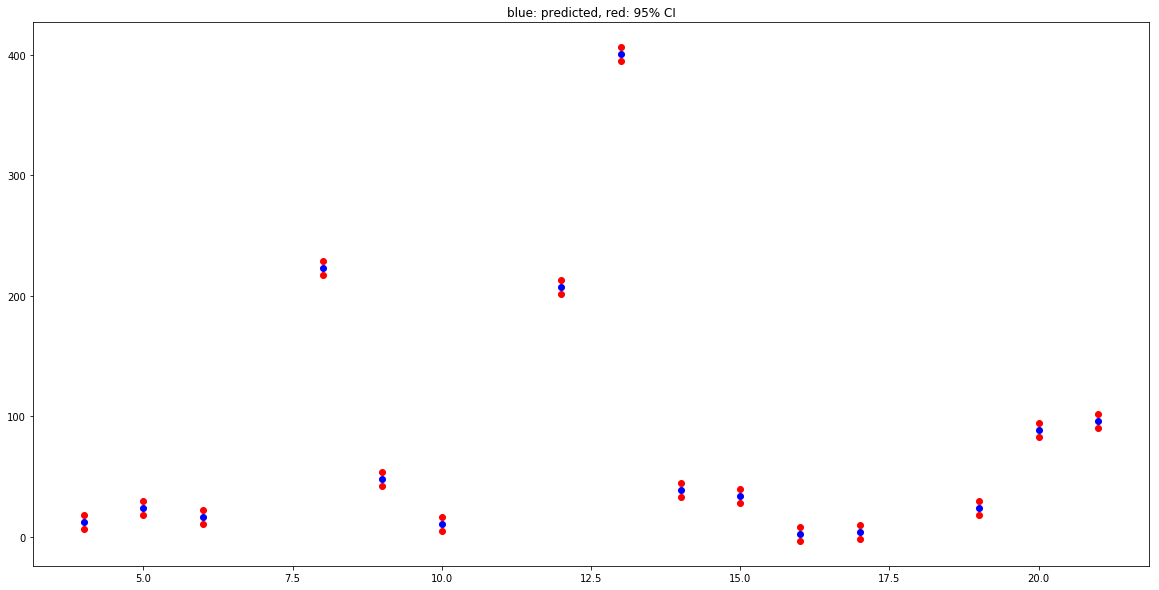

In [34]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [35]:
initial_cleaning('NYC_Offenses_2014.csv')

                             Table 8  Unnamed: 1      Unnamed: 2  \
0                           NEW YORK         NaN             NaN   
1  Offenses Known to Law Enforcement         NaN             NaN   
2                      by City, 2014         NaN             NaN   
3                               City  Population  Violent\ncrime   
4                      Adams Village       1,851               0   

                               Unnamed: 3                    Unnamed: 4  \
0                                     NaN                           NaN   
1                                     NaN                           NaN   
2                                     NaN                           NaN   
3  Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1   
4                                       0                           NaN   

                    Unnamed: 5 Unnamed: 6           Unnamed: 7  \
0                          NaN        NaN                  NaN   
1       

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,"by City, 2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,nan
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0,nan
5,Addison Town and Village,"2,568",2,0,NaN,0,1,1,49,1,47,1,0,nan
6,Afton Village4,820,0,0,0,NaN,0,0,1,0,1,0,0,nan
7,Akron Village,"2,842",1,0,NaN,0,0,1,17,0,17,0,0,nan
8,Albany4,"98,595",802,8,54,NaN,237,503,"3,888",683,"3,083",122,12,nan
9,Albion Village4,"5,872",26,0,3,NaN,2,21,204,41,159,4,0,nan


In [36]:
crime_2 = pd.DataFrame(initial_cleaning('NYC_Offenses_2014.csv'))

                             Table 8  Unnamed: 1      Unnamed: 2  \
0                           NEW YORK         NaN             NaN   
1  Offenses Known to Law Enforcement         NaN             NaN   
2                      by City, 2014         NaN             NaN   
3                               City  Population  Violent\ncrime   
4                      Adams Village       1,851               0   

                               Unnamed: 3                    Unnamed: 4  \
0                                     NaN                           NaN   
1                                     NaN                           NaN   
2                                     NaN                           NaN   
3  Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1   
4                                       0                           NaN   

                    Unnamed: 5 Unnamed: 6           Unnamed: 7  \
0                          NaN        NaN                  NaN   
1       

In [37]:
# delete rows :3

crime_2 = crime_2.drop(crime_2.index[[0, 1, 2, 3]])

In [38]:
# delete last 7 rows

crime_2 = crime_2.drop(crime_2.index[[369, 370, 371, 372, 373, 374, 375]])

In [39]:
# rename columns

crime_2 = crime_2.rename(columns={'Table 8' : 'city', 'Unnamed: 1' : 'population', 'Unnamed: 2' : 'violent_crime',
                              'Unnamed: 3' : 'murder', 'Unnamed: 4' : 'rape_revised', 'Unnamed: 5' : 'rape',
                              'Unnamed: 6' :'robbery', 'Unnamed: 7' : 'aggravated_assault',
                              'Unnamed: 8' : 'property_crime','Unnamed: 9' : 'burglary', 'Unnamed: 10' : 'larceny',
                              'Unnamed: 11' : 'vehicle_theft', 'Unnamed: 12' : 'arson', 'Unnamed: 13' : 'empty'})

In [40]:
# drop pop_sq column from dataset

crime_2 = crime_2.drop('empty', 1)

In [41]:
# remove commas from columns

crime_2 = crime_2.replace(',','', regex=True)

In [42]:
# verify columns renamed, commas removed & empty column dropped

crime_2.head()

,city,population,violent_crime,murder,rape_revised,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft,arson
4,Adams Village,1851,0,0,NaN,0,0,0,11,1,10,0,0
5,Addison Town and Village,2568,2,0,NaN,0,1,1,49,1,47,1,0
6,Afton Village4,820,0,0,0,NaN,0,0,1,0,1,0,0
7,Akron Village,2842,1,0,NaN,0,0,1,17,0,17,0,0
8,Albany4,98595,802,8,54,NaN,237,503,3888,683,3083,122,12


In [43]:
# verify last 7 rows dropped from table

crime_2.tail()

,city,population,violent_crime,murder,rape_revised,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft,arson
368,Woodbury Town4 5,10739,4,0,0,NaN,1,3,NaN,5,NaN,0,0
369,Woodstock Town4,5907,3,0,1,NaN,2,0,43,14,29,0,0
370,Yonkers4,200624,974,3,33,NaN,358,580,2009,414,1395,200,15
371,Yorktown Town4,36989,13,0,0,NaN,0,13,209,24,182,3,0
372,Youngstown Village4,1896,0,0,0,NaN,0,0,1,0,1,0,0


In [44]:
# change population column from object to float

crime_2['population'] = crime_2['population'].astype(float)
crime_2['population'].describe()

count       369.000
mean      37814.824
std      441159.058
min          79.000
25%        2631.000
50%        6581.000
75%       15408.000
max     8473938.000
Name: population, dtype: float64

In [45]:
crime_2 = crime_2[crime_2.population < (np.percentile(crime_2.population, 75))]

In [46]:
crime_2['population'].describe()

count     276.000
mean     5281.518
std      3848.133
min        79.000
25%      2177.500
50%      4018.500
75%      7925.000
max     15242.000
Name: population, dtype: float64

In [47]:
# change property crime column from object to float

crime_2['property_crime'] = crime_2['property_crime'].astype(float)
crime_2['property_crime'].describe()

count    275.000
mean      89.960
std      127.068
min        0.000
25%       17.000
50%       44.000
75%      113.000
max     1090.000
Name: property_crime, dtype: float64

In [48]:
# change robbery column from object to float

crime_2['robbery'] = crime_2['robbery'].astype(float)
crime_2['robbery'].describe()

count   276.000
mean      1.301
std       2.878
min       0.000
25%       0.000
50%       0.000
75%       1.000
max      23.000
Name: robbery, dtype: float64

In [49]:
# change murder column from object to float

crime_2['murder'] = crime_2['murder'].astype(float)
crime_2['murder'].describe()

count   276.000
mean      0.040
std       0.214
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       2.000
Name: murder, dtype: float64

In [50]:
# change violent crime column from object to float

crime_2['violent_crime'] = crime_2['violent_crime'].astype(float)
crime_2['violent_crime'].describe()

count   276.000
mean      6.667
std      11.203
min       0.000
25%       0.000
50%       2.000
75%       8.000
max      75.000
Name: violent_crime, dtype: float64

In [51]:
# change rape_revised def column from object to float

crime_2['rape_revised'] = crime_2['rape_revised'].astype(float)
crime_2['rape_revised'].describe()

count   159.000
mean      1.447
std       2.652
min       0.000
25%       0.000
50%       1.000
75%       2.000
max      18.000
Name: rape_revised, dtype: float64

In [52]:
# drop rape_revised column from dataset

crime_2 = crime_2.drop('rape_revised', 1)

In [53]:
# change rape column from object to float

crime_2['rape'] = crime_2['rape'].astype(float)
crime_2['rape'].describe()

count   117.000
mean      0.000
std       0.000
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       0.000
Name: rape, dtype: float64

In [54]:
# change aggravated assault column from object to float

crime_2['aggravated_assault'] = crime_2['aggravated_assault'].astype(float)
crime_2['aggravated_assault'].describe()

count   276.000
mean      4.493
std       7.579
min       0.000
25%       0.000
50%       2.000
75%       6.000
max      48.000
Name: aggravated_assault, dtype: float64

In [55]:
# change burglary column from object to float

crime_2['burglary'] = crime_2['burglary'].astype(float)
crime_2['burglary'].describe()

count   276.000
mean     14.069
std      19.855
min       0.000
25%       2.000
50%       7.000
75%      17.250
max     132.000
Name: burglary, dtype: float64

In [56]:
# change larceny column from object to float

crime_2['larceny'] = crime_2['larceny'].astype(float)
crime_2['larceny'].describe()

count   275.000
mean     73.927
std     107.815
min       0.000
25%      12.000
50%      37.000
75%      91.000
max     950.000
Name: larceny, dtype: float64

In [57]:
# change vehicle theft column from object to float

crime_2['vehicle_theft'] = crime_2['vehicle_theft'].astype(float)
crime_2['vehicle_theft'].describe()

count   276.000
mean      1.924
std       2.845
min       0.000
25%       0.000
50%       1.000
75%       3.000
max      16.000
Name: vehicle_theft, dtype: float64

In [58]:
# change arson column from object to float

crime_2['arson'] = crime_2['arson'].astype(float)
crime_2['arson'].describe()

count   274.000
mean      0.303
std       0.851
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       6.000
Name: arson, dtype: float64

In [59]:
# drop arson column

crime_2 = crime_2.drop('arson', 1)

In [60]:
crime_2 = crime_2.dropna()

In [61]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'property_crime ~ burglary+larceny+robbery'

# Fit the model to our data using the formula.
lm_2 = smf.ols(formula=linear_formula, data=crime_2).fit()

In [62]:
lm_2.params

Intercept   0.670
burglary    1.003
larceny     1.005
robbery     0.527
dtype: float64

In [63]:
lm_2.pvalues

Intercept   0.001
burglary    0.000
larceny     0.000
robbery     0.000
dtype: float64

In [64]:
lm_2.rsquared

0.99951481215122318

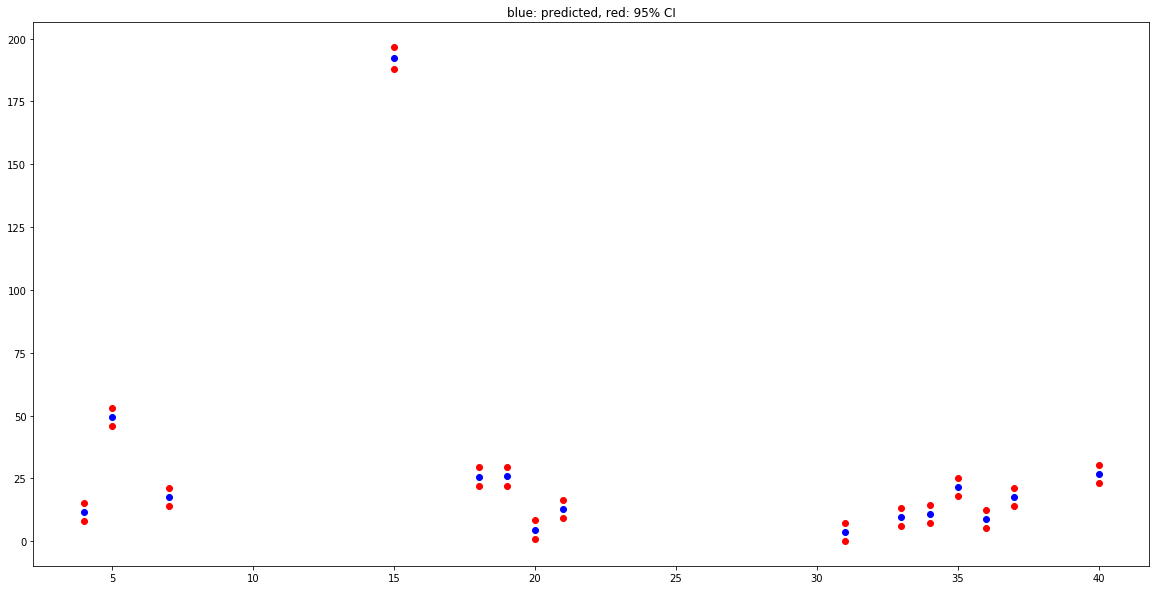

In [65]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm_2)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm_2.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [66]:
# Instantiate and fit model 2013 crime data

regr = linear_model.LinearRegression()
Y = crime['property_crime'].values.reshape(-1, 1)
X = crime[['robbery','burglary','larceny']]
regr.fit(X, Y)

# Inspect the results

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.29400745  1.04973419  1.00486028]]

Intercept: 
 [ 0.47205298]

R-squared:
0.999564228255


In [67]:
data = crime[['burglary'] + ['larceny'] + ['robbery']]
target = crime['property_crime']

y_pred = regr.fit(data, target).predict(data)

In [68]:
# Instantiate and fit model 2014 crime data

regr_2 = linear_model.LinearRegression()
Y = crime_2['property_crime'].values.reshape(-1, 1)
X = crime_2[['robbery','burglary','larceny']]
regr_2.fit(X, Y)

# Inspect the results

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr_2.score(X, Y))


Coefficients: 
 [ 1.04973419  1.00486028  0.29400745]

Intercept: 
 0.472052981758

R-squared:
0.999514812151


In [69]:
data_2 = crime_2[['burglary'] + ['larceny'] + ['robbery']]
target_2 = crime_2['property_crime']

y_pred_2 = regr_2.fit(data, target).predict(data)

In [70]:
print(data.shape)
f = len(data)
g = round(.20 * f)
h = round(.80 * f)
print(g)
print(h)
training_data = data[:h] 
training_target = target[:h]
testing_data = data_2[:-g]
testing_target = target_2[:-g]

y_pred = regr.fit(training_data, training_target).predict(testing_data)
y_pred_2 = regr_2.fit(testing_data, testing_target).predict(training_data)

# shape tells the shape of object by rows & columns

(261, 3)
52
209


In [71]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(data, target).score(data, target)))

With 20% Holdout: 0.999639006881
Testing on Sample: 0.999564228255


In [72]:
# cross validation scores for 2013 crime data

from sklearn.model_selection import cross_val_score
cross_val_score(regr, data, target, cv=10)

array([ 0.99962112,  0.99960075,  0.99954949,  0.9997276 ,  0.99922556,
        0.99929676,  0.99971423,  0.99965356,  0.99891864,  0.99933899])

In [73]:
# cross validation scores for 2014 crime data

from sklearn.model_selection import cross_val_score
cross_val_score(regr_2, data_2, target_2, cv=10)

array([ 0.9963047 ,  0.99948272,  0.99955383,  0.99947223,  0.99980406,
        0.99952423,  0.99889762,  0.99816342,  0.99890504,  0.99907135])

**Using parameters most closely to property crime allowed for the most efficient predictio model.  Using features less closely related decreased prediction accuracy.  Burglary, larceny and robbery are all crimes that can be comitted in conjunction with property crime, so it leans true that using these parameters would increase model prediciton accuracy.**